# Shriti
## Task-2 Unsupervised Learning:
### From this iris dataset, predicting it optimum number of clusters using KNN and show it visually.

### Loading libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.shape

(150, 4)

In [10]:
df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x=df.iloc[:,0:4].values
y=iris['target']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
len(X_train)

120

In [15]:
X_train.shape

(120, 4)

In [16]:
from sklearn.svm import SVC

In [17]:
model=SVC()
model.fit(X_train,y_train)

SVC()

In [18]:
model.score(X_test,y_test)

1.0

In [19]:
y_predicted=model.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

<AxesSubplot:>

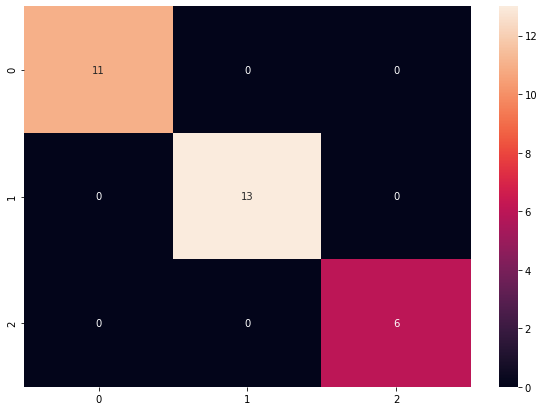

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)

### Elbow Plot

In [22]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)    

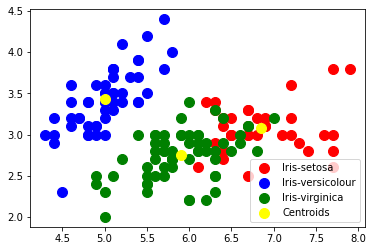

In [23]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

Text(0, 0.5, 'wcss')

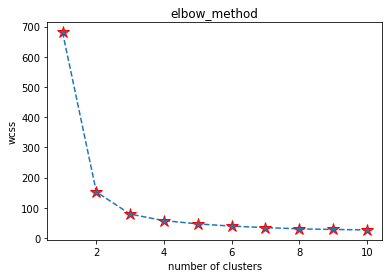

In [24]:
plt.plot(range(1,11),wcss,marker='*',linestyle='dashed',markersize=12,markeredgecolor='red')
plt.title("elbow_method")
plt.xlabel("number of clusters")
plt.ylabel("wcss")